# Tutorial 1: Part 2

Objectives:
- Learn how to define a simple lattice and compute the TWISS functions using MAD-X.
- Thick vs thin lense approximation TWISS comparison for a lattice with only quadrupoles.
- Tune and $\beta$-function dependence on K1.

**My first accelerator: a FODO cell**

1. Make a simple lattice FODO cell with:
    - $L_{cell}$= 100 m
    - Focusing and defocusing quadrupoles of 5 m long ($L_{quad}$). 
    - Put the start of the first qudrupole at the start of the sequence. 
    - Each quadrupole has a focal length f = 200 m (HINT: k1 x $L_{quad}$ = 1/f).


2. Define a proton beam at $E_{tot}$= 2 GeV. Activate the sequence and try to find the periodic solution and plot the $\beta$-functions. If you found $\beta_{max}$= 460 m you succeded.


3. Using the plot you obtained can you estimate the phase advance of the cell. Compare with the tunes obtained with the TWISS.

**Matching the FODO cell using a parametric plot**

4. Try to twiss it powering the quds to obtain a $\Delta \mu \approx 90^\circ$ in the cell using the thin lense approximation (HINT: using the figures from Tutorial 1: Part 1). What is the actual phase advance computed by MAD-X?

**BONUS:**

5. What is the $\beta_{max}$? Compare with the thin lense approximation (using the figures from Tutorial 1: Part 1).


6. Halve the focusing strength of the quadrupoles, what is the effect of it on the $\beta_{max}$ and $\beta_{min}$ and on the $\Delta \mu$? Compare with the parametric plots.

7. Compute the maximum beam size $\sigma$ assuming a normalized emittance of 3 mrad mm and $E_{tot}= 7 TeV$.

8. Try with $E_{tot}$ = 0.7 GeV: what is the MAD-X error message?

9. Try with f= 20 m: what is the MAD-x error message?

In [1]:
#Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from cpymad.madx import Madx 

# Launching MAD-X

In [3]:
myMad = Madx(stdout=True)

1. Make a simple lattice FODO cell with:
    - $L_{cell}$= 100 m
    - Focusing and defocusing qudrupoles of 5 m long ($L_{quad}$). 
    - Put the start of the first qudrupole at the start of the sequence. 
    - Each quadrupole has a focal length f = 200 m (HINT: k1 x $L_{quad}$ = 1/f).


2. Define a proton beam at $E_{tot}$= 2 GeV. Activate the sequence and try to find the periodic solution and plot the $\beta$-functions. If you found $\beta_{max}$= 460 m you succeded.

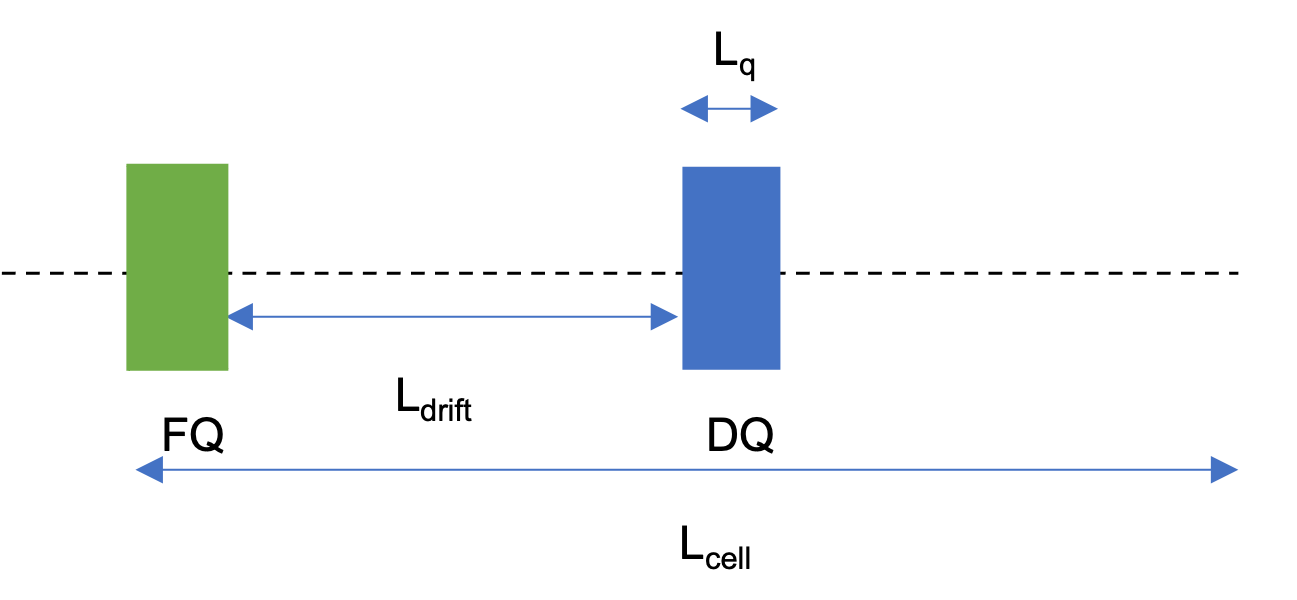


In [11]:
#myMad = Madx(stdout=True)
myMad = Madx()
myString='''
! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell=100;
quadrupoleLenght=5;
f=200;
myK:=1/f/quadrupoleLenght;// m^-2

! *********************************************************************
! Definition of magnets
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLenght, K1:=myK;
QD: quadrupole, L=quadrupoleLenght, K1:=-myK;

! *********************************************************************
! Definition of sequence
! *********************************************************************
myCell:sequence, refer=entry, L=L_CELL;
quadrupole1: QF, at=0;
marker1: marker, at=25;
quadrupole2: QD, at=50;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
title, 'My first twiss';
twiss, file=MyfirstFODO.madx;
plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="test",file=MyfirstFODO;

value myK;
'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.30 19:40:57      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
     0.03853349451     -0.04384718845        463.6232883                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0      0.03853349451 

               dq2            betymax              dymax 

In [3]:
########################
# Using MAD-X commands #
########################
myString='''
value, table(SUMM,Q1);
value, table(SUMM,betymax);
'''
myMad.input(myString);

table( summ q1 )   =      0.03853349451 ;
table( summ betymax ) =        463.6232883 ;


In [4]:
#########################
# Using python commands #
#########################
# SUMM table
myDF=myMad.table.summ.dframe()
myDF
myDF["q1"]

#e    0.038533
Name: q1, dtype: float64

In [5]:
#########################
# Using python commands #
#########################
# TWISS table
myDF=myMad.table.twiss.dframe()
myDF[['name','s','betx','bety','alfx','alfy','mux','muy']]

,name,s,betx,bety,alfx,alfy,mux,muy
#s,mycell$start:1,0.0,463.623288,369.779162,-1.156109,0.929316,0.000000,0.000000
quadrupole1,quadrupole1:1,5.0,463.623288,369.779162,1.156109,-0.929316,0.001709,0.002161
drift_0[0],drift_0:0,25.0,419.394867,408.967742,1.055312,-1.030113,0.008930,0.010350
marker1,marker1:1,25.0,419.394867,408.967742,1.055312,-1.030113,0.008930,0.010350
drift_1[0],drift_1:0,50.0,369.779162,463.623288,0.929316,-1.156109,0.019041,0.019493
quadrupole2,quadrupole2:1,55.0,369.779162,463.623288,-0.929316,1.156109,0.021202,0.021202
drift_2[0],drift_2:0,100.0,463.623288,369.779162,-1.156109,0.929316,0.038533,0.038533
#e,mycell$end:1,100.0,463.623288,369.779162,-1.156109,0.929316,0.038533,0.038533


<IPython.core.display.Javascript object>


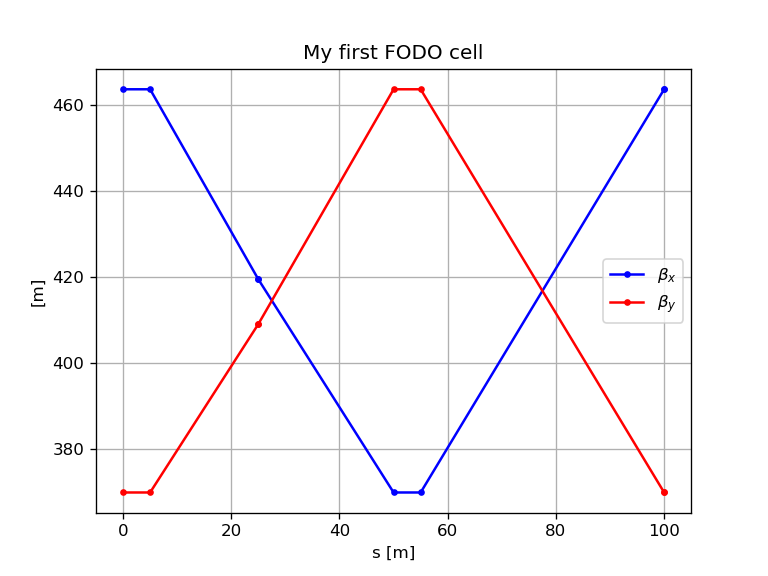

Text(0.5, 1.0, 'My first FODO cell')

In [6]:
%matplotlib notebook
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 80
# Plot
plt.plot(myDF['s'],myDF['betx'],'.-b',label='$\\beta_x$')
plt.plot(myDF['s'],myDF['bety'],'.-r',label='$\\beta_y$')
plt.legend()
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.title('My first FODO cell')

If you found $\beta_{max}$= 463.6 m you succeded!

# Tune from the plot
3. Using the plot you obtained can you estimate the phase advance of the cell. Compare with the tunes obtained with the TWISS.

For the phase advance one can consider the definition

\begin{equation}
\mu=\int\frac{1}{\beta(s)}ds.
\end{equation}

Remember that the unit of phase in MAD-X is [2$\pi$].

In [104]:
# A very basic approximation considering a constant beta
# The mean beta value is 
1/417.*100/2/np.pi

0.039788735772973836

In [105]:
# computing the integral
np.trapz(1/myDF['betx'],myDF['s'])/2/np.pi

0.03862786461917964

In [106]:
# correct values from MAD-X TWISS commands
myDF.iloc[-1]['mux']

0.03853349450910022

# **Matching the FODO cell using a parametric plot**
4. Try to twiss it powering the quadrupoles to obtain a $\Delta \mu \approx 90^\circ$ in the cell using the thin lense approximation (using the figures from Tutorial 1: Part 1). What is the actual phase advance computed by MAD-X?

In [110]:
myMad = Madx(stdout=True)

In [8]:
# From the plot from Tutoria 1 - part1, for 90 degrees phase advance k*Lcell*lq=2.8
quadrupoleLenght=5
cellLength=100
myK=2.8/cellLength/quadrupoleLenght
print(myK)

0.005599999999999999


In [12]:
myString='''
! Definition of parameters
quadrupoleLenght=5;
cellLength=100;
myK=2.8/cellLength/quadrupoleLenght;// m^-2

! Definition of magnet
QF: quadrupole, L=quadrupoleLenght, K1:=myK;
QD: quadrupole, L=quadrupoleLenght, K1:=-myK;

! Definition of sequence
myCell:sequence, refer=entry, L=cellLength;
q1: QF, at=0;
q2: QD, at=cellLength/2;
endsequence;

! Definition of beam
beam, particle=proton, energy=7000;
use, sequence=myCell;

! TWISS
select, flag=twiss, clear;
select, flag=twiss, column=name, keyword, s, betx, alfx, mux, bety, alfy, muy;
twiss;
value, myK;
'''
myMad.input(myString);

++++++ info: quadrupolelenght redefined
++++++ info: myk redefined
++++++ info: element redefined: qf
++++++ info: element redefined: qd
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2363728498      -0.2921003657        160.6036546                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
     -0.2921003657        160.6036546                 -0                  0 

            ycomax             ycorms           

In [10]:
myDFTable=myMad.table.twiss.dframe()
myDFTable[["name", "keyword","betx","bety","alfx","alfy", "mux", "muy" ]]

,name,keyword,betx,bety,alfx,alfy,mux,muy
#s,mycell$start:1,marker,160.603655,34.217492,-2.259847,0.548735,0.000000,0.000000
q1,q1:1,quadrupole,160.603655,34.217492,2.259847,-0.548735,0.004841,0.023892
drift_0[0],drift_0:0,drift,34.217492,160.603655,0.548735,-2.259847,0.108661,0.127712
q2,q2:1,quadrupole,34.217492,160.603655,-0.548735,2.259847,0.132553,0.132553
drift_1[0],drift_1:0,drift,160.603655,34.217492,-2.259847,0.548735,0.236373,0.236373
#e,mycell$end:1,marker,160.603655,34.217492,-2.259847,0.548735,0.236373,0.236373


In [114]:
myString='''
value, table(SUMM,Q1);
value, table(SUMM,Q2);
'''
myMad.input(myString);

In [115]:
#Phase advance computed by MADX in rad
0.236*2*np.pi

1.4828317324943823

In [116]:
#Phase advance computed by MADX in degrees
1.4828317324943823*180/np.pi

84.96

**BONUS:**

5. What is the $\beta_{max}$? Compare with the thin lense approximation (using the figures from Tutorial 1: Part 1).

In [117]:
# From the MAD-X calculation
myDFTable['betx'].max()

160.60365457633432

In [118]:
myDFTable['bety'].max()

160.6036545763342

In [119]:
#From the parametric plot Figure 1 
#K1*Lcell*Lq=
0.0056*100*5

2.8

In [120]:
#From the parametric plot Figure 2
1.697*100

169.70000000000002

6. Halve the focusing strength of the quadrupoles, what is the effect of it on the $\beta_{max}$ and $\beta_{min}$ and on the $\Delta \mu$? Compare with the parametric plots.

In [17]:
myString='''

myK=1.4/cellLength/quadrupoleLenght;// m^-2
twiss, file=firstTwiss.txt;
'''

myMad.input(myString);

++++++ info: myk redefined
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.1097922006      -0.1143581814        205.4604013                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.1097922006 

               dq2            betymax              dymax              dyrms 
     -0.1143581814        205.4604013                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

   

In [18]:
myString='''
value, table(SUMM,Q1);
value, table(SUMM,Q2);
value, table(SUMM,betxmax);
value, table(SUMM,betymax);
'''
myMad.input(myString);

table( summ q1 )   =       0.1097922006 ;
table( summ q2 )   =       0.1097922006 ;
table( summ betxmax ) =        205.4604013 ;
table( summ betymax ) =        205.4604013 ;


In [19]:
myDFTable=myMad.table.twiss.dframe()
myDFTable

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.0,205.460401,-1.434644,0.000000,106.483860,0.764835,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q1,q1:1,quadrupole,5.0,205.460401,1.434644,0.003828,106.483860,-0.764835,0.007564,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,50.0,106.483860,0.764835,0.053029,205.460401,-1.434644,0.056764,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,55.0,106.483860,-0.764835,0.060592,205.460401,1.434644,0.060592,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,100.0,205.460401,-1.434644,0.109792,106.483860,0.764835,0.109792,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#e,mycell$end:1,marker,100.0,205.460401,-1.434644,0.109792,106.483860,0.764835,0.109792,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#betxmax and betaxmin increased

In [20]:
# From the plot
#K1*Lcell*Lq
0.0028*100*5

1.4

In [21]:
#Max. betax
2.042*100

204.2

If we reduce the k the bmax increases and therfore the beam size.

In [22]:
# Value from MADX
bmax=np.max(myDFTable["betx"])
bmax

205.46040125139595

Better agreement is observed as we move to the left on the parametric plot (smaller K or smaller Lq for a fixed value of the cell length) as the thin lense approximation condition is better satisfied.

7. Compute the maximum beam size $\sigma$ assuming a normalized emittance of 3 mrad mm and $E_{tot}= 7 TeV$.

One has to remember
\begin{equation} \sigma=\sqrt{\frac{\beta \epsilon_n}{ \gamma_r}} \end{equation} 

In [121]:
import numpy as np
emittance_n=3e-6 #m*rad
beta_gamma=7000/.938 # this is an approximation
np.sqrt(myDFTable['betx'].max()*emittance_n/beta_gamma)

0.00025409185177743577

# Varying the energy
8. Try with $E_{tot}$ = 0.7 GeV: what is the MAD-X error message?

In [107]:
# with this simple wrapper in case of error the code enter in an infinite loop you have to stop manually.
myString='''
beam, particle=proton, energy=0.7;
title, 'My third twiss';
twiss;
'''
myMad.input(myString);

RuntimeError: MAD-X has stopped working!

There is an error due to the fact that the total energy is lower than the rest proton mass.


# With f=20 m
9. Try with f= 20 m: what is the MAD-x error message?

In [108]:
myMad = Madx(stdout=True)

In [7]:
myString='''
! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell=100;
quadrupoleLenght=5;
f=20;
myK:=1/f/quadrupoleLenght;// m^-2

! *********************************************************************
! Definition of magnet
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLenght, K1:=myK;
QD: quadrupole, L=quadrupoleLenght, K1:=-myK;


! *********************************************************************
! Definition of sequence
! *********************************************************************
myCell:sequence, refer=entry, L=L_CELL;
quadrupole1: QF, at=0;
marker1: marker, at=25;
quadrupole2: QD, at=50;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
select, flag=twiss, clear;
select, flag=twiss, column=name, keyword, s, betx, alfx, mux, bety, alfy, muy, x, px, y, py, dx, dy, dx, dpx, dy, dpy;
twiss, file=f20.txt;
'''
myMad.input(myString);

++++++ info: l_cell redefined
++++++ info: quadrupolelenght redefined
++++++ info: f redefined
++++++ info: myk redefined
++++++ info: element redefined: qf
++++++ info: element redefined: qd
++++++ warning: implicit element re-definition ignored: quadrupole1
++++++ warning: implicit element re-definition ignored: marker1
++++++ warning: implicit element re-definition ignored: quadrupole2
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
++++++ warning: TWCLORB:  Horizontal plane might be unstable More information with the debug flag on.                                                                                                                                                                               
++++++ warning: TWCLORB:  Vertical plane might be unstable More information with the debug flag on.                                                          

**INTERPRETATION**: The cell is unstable due to the fact that the focal length is too short. Please note the value of the cosmux and cosmuy. **REMEMBER** |Trace(M)|< 2; -1 <= cos $\mu$ <= 1

# EXTRA

# Adding markers

This is an example to add markers in the sequence using a macros.


In [23]:
myMad=Madx(stdout=True)
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

option, echo=false, info=false, warn=false;
l_cell=100;
quadrupoleLenght=5;
f=200;
myK:=1/f/quadrupoleLenght;// m^-2

! *********************************************************************
! Definition of magnet
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLenght, K1:=myK;
QD: quadrupole, L=quadrupoleLenght, K1:=-myK;


installMarkers(nn): macro ={
markernn: marker, at=nn;
!value,f;
};
N=6;


! *********************************************************************
! Definition of sequence
! *********************************************************************
myCell:sequence, REFER=centre, L=L_CELL;
quadrupole1: QF, at=2.5;
while (N<50) {
exec, installMarkers($N);
N=N+1;
}
quadrupole2: QD, at=52.5;
N=56;
while (N<100) {
exec, installMarkers($N);
N=N+1;
}
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
select, flag=twiss, clear;
select, flag=twiss, column=name, keyword, L, s, betx, alfx, mux, bety, alfy, muy, x, px, y, py, dx, dy, dx, dpx, dy, dpy;

title, 'My fourth twiss';
twiss, file=WithMarkers.txt;
'''
myMad.input(myString);

In [24]:
myDF=myMad.table.twiss.dframe()
myDF.head()

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.0,463.623288,-1.156109,0.000000,369.779162,0.929316,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1,quadrupole1:1,quadrupole,5.0,463.623288,1.156109,0.001709,369.779162,-0.929316,0.002161,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,6.0,461.316110,1.151069,0.002053,371.642834,-0.934356,0.002590,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
marker6,marker6:1,marker,6.0,461.316110,1.151069,0.002053,371.642834,-0.934356,0.002590,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,7.0,459.019012,1.146029,0.002399,373.516585,-0.939396,0.003018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


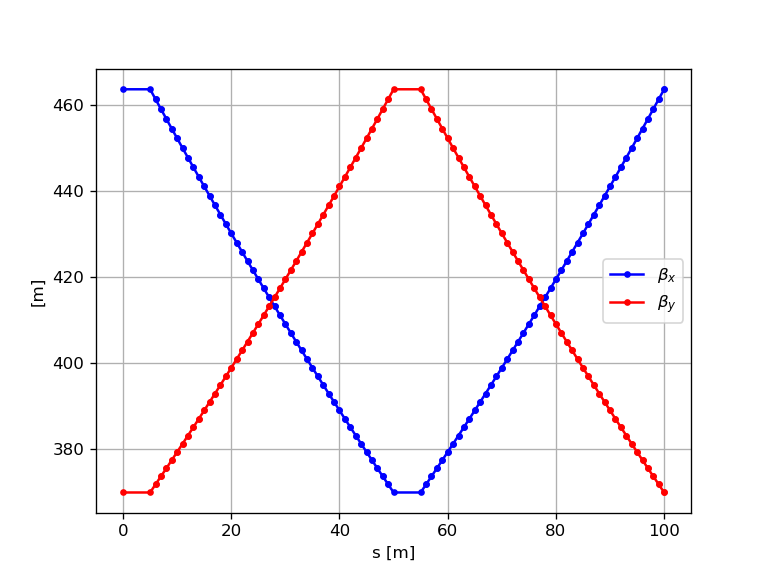

In [25]:
%matplotlib notebook
plt.plot(myDF['s'],myDF['betx'],'.-b',label='$\\beta_x$')
plt.plot(myDF['s'],myDF['bety'],'.-r',label='$\\beta_y$')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend(loc='best')
plt.grid()

In [27]:
np.trapz(1/myDF['betx'],myDF['s'])/2/np.pi

0.03853163530259353

In [28]:
# Value from MADX
bmax=np.max(myDF["betx"])
bmax

463.6232883078409

# Thin lense approximation

In [29]:
myString='''
select, flag=makethin, class=quadrupole, slice=5; 
makethin,sequence=myCell;
use,sequence=myCell;      
twiss,sequence=myCell,file=thin.txt;
'''
myMad.input(myString);

In [30]:
myDF_thin=myMad.table.twiss.dframe()
myDF_thin

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.000000,463.623069,-1.156108,0.000000,369.779039,0.929315,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,0.416667,464.587367,-1.158208,0.000143,369.005484,0.927215,0.000180,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1..1,quadrupole1..1:1,multipole,0.416667,464.587367,-0.693620,0.000143,369.005484,0.558210,0.000180,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,1.458333,466.035869,-0.696941,0.000499,367.846404,0.554507,0.000630,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1..2,quadrupole1..2:1,multipole,1.458333,466.035869,-0.230905,0.000499,367.846404,0.186661,0.000630,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
marker98,marker98:1,marker,98.000000,459.018797,-1.146028,0.037843,373.516458,0.939395,0.037677,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_97[0],drift_97:0,drift,99.000000,461.315893,-1.151068,0.038189,371.642709,0.934355,0.038104,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
marker99,marker99:1,marker,99.000000,461.315893,-1.151068,0.038189,371.642709,0.934355,0.038104,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_98[0],drift_98:0,drift,100.000000,463.623069,-1.156108,0.038533,369.779039,0.929315,0.038533,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


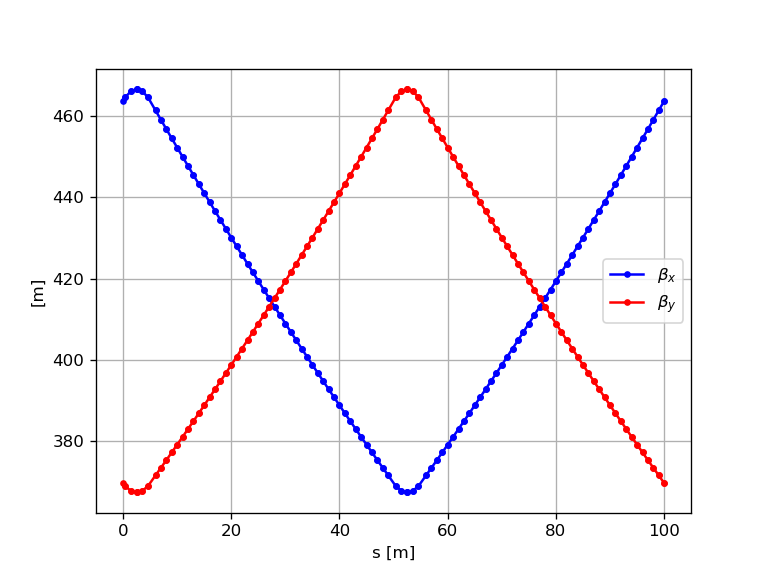

In [31]:
%matplotlib notebook
plt.plot(myDF_thin['s'],myDF_thin['betx'],'.-b',label='$\\beta_x$')
plt.plot(myDF_thin['s'],myDF_thin['bety'],'.-r',label='$\\beta_y$')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend(loc='best')
plt.grid()

In [32]:
np.trapz(1/myDF_thin['betx'],myDF_thin['s'])/2/np.pi

0.038533549044816415

In [33]:
# Value from MADX
bmax=np.max(myDF_thin["betx"])
bmax

466.5193742711588